In [1]:
path_input = '/home/hanna/lagrings/ERA5_monthly/'
import numpy as np
import glob
import xarray as xr
import os

In [2]:
files = glob.glob(os.path.join(path_input, '2012_02*.nc'))

In [3]:
files

['/home/hanna/lagrings/ERA5_monthly/2012_02_q.nc',
 '/home/hanna/lagrings/ERA5_monthly/2012_02_r.nc',
 '/home/hanna/lagrings/ERA5_monthly/2012_02_t2m.nc',
 '/home/hanna/lagrings/ERA5_monthly/2012_02_sp.nc',
 '/home/hanna/lagrings/ERA5_monthly/2012_02_tcc.nc']

In [4]:
data = xr.open_mfdataset(files, compat='no_conflicts', join='outer')

/home/hanna/anaconda3/envs/final/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  """Entry point for launching an IPython kernel.
/home/hanna/anaconda3/envs/final/lib/python3.7/site-packages/xarray/backends/api.py:941: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).The datasets supplied require both concatenation and merging. From
xarr

In [6]:
subset = data.isel(time = 0)

In [10]:
import seaborn as sns

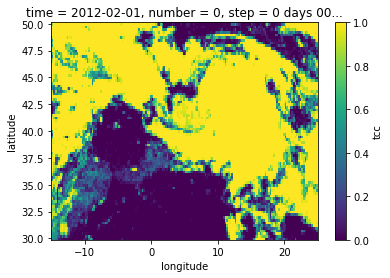

In [12]:
subset['tcc'].plot()

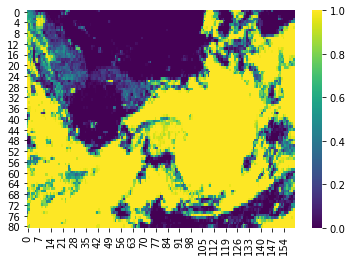

In [16]:
sns.heatmap(subset['tcc'].values, cmap = 'viridis')

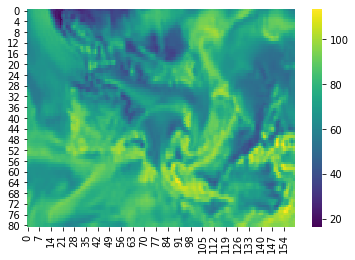

In [15]:
sns.heatmap(subset['r'].values, cmap = 'viridis')

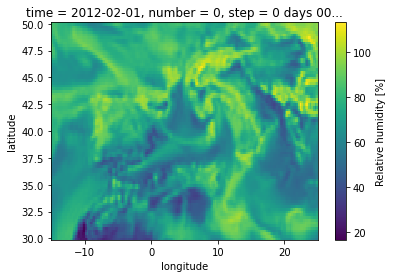

In [14]:
subset['r'].plot()

In [7]:
data

<xarray.Dataset>
Dimensions:        (latitude: 81, longitude: 161, time: 696)
Coordinates:
  * latitude       (latitude) float64 30.0 30.25 30.5 30.75 ... 49.5 49.75 50.0
  * time           (time) datetime64[ns] 2012-02-01 ... 2012-02-29T23:00:00
  * longitude      (longitude) float64 -15.0 -14.75 -14.5 ... 24.5 24.75 25.0
    number         int64 0
    step           timedelta64[ns] 00:00:00
    isobaricInhPa  int64 1000
    valid_time     (time) datetime64[ns] dask.array<chunksize=(696,), meta=np.ndarray>
    surface        int64 0
Data variables:
    tcc            (time, latitude, longitude) float64 dask.array<chunksize=(696, 81, 161), meta=np.ndarray>
    nr_nans        (time, latitude, longitude) float64 dask.array<chunksize=(696, 81, 161), meta=np.ndarray>
    q              (time, latitude, longitude) float32 dask.array<chunksize=(696, 81, 161), meta=np.ndarray>
    r              (time, latitude, longitude) float32 dask.array<chunksize=(696, 81, 161), meta=np.ndarray>
    sp             (time, latitude, longitude) float32 dask.array<chunksize=(696, 81, 161), meta=np.ndarray>
    t2m            (time, latitude, longitude) float32 dask.array<chunksize=(696, 81, 161), meta=np.ndarray>
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2020-02-20T09:59:12 GRIB to CDM+CF via cfgrib-0....

In [8]:
ref_data = data['tcc'].values

In [10]:
ref_data.shape

(696, 81, 161)

In [9]:
storang = np.zeros((81, 161, 4))

In [11]:
storang = np.zeros((81, 161, 4))
for k, var in enumerate(['r', 'q', 't2m', 'sp']):
    dta = data[var].values
    for i in range(81):
        for j in range(161):
            storang[i,j,k] = np.corrcoef(ref_data[:, i, j], dta[:, i, j])[0][1]

In [13]:
storang.shape

(81, 161, 4)

# Plot local linear correlation 

In [17]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

from sclouds.helpers import (path_input, path_stats_results, VARIABLES,
                                UNITS, LONGNAME)
#from sclouds.io.utils import get_xarray_dataset_for_period
from sclouds.plot.helpers import (TEXT_WIDTH_IN, TEXT_HEIGHT_IN,
                                    path_python_figures, import_matplotlib,
                                    cmap_contour_plot, levels_contourplot,
                                    color_maps)
mat = import_matplotlib() #for mye
import matplotlib.pyplot as plt
VARIABLES = ['r', 'q', 't2m', 'sp']
n_rows = len(VARIABLES)
n_cols = 1

Warning.. Using pgf backend, no GUI available. use plt.savefig() for inpection


In [19]:

fig, axes =  plt.subplots(nrows = n_rows, ncols = n_cols, sharex=True, sharey=False)
fig.set_size_inches(w = TEXT_WIDTH_IN, h = TEXT_HEIGHT_IN - 1)
counter = 0
for var, ax in zip(VARIABLES, axes):
    #if var != 'tcc':
    #print('Warning this duplicates the RH in plot for tcc')
    #vals   = data[var].values
    cntours = ax.contourf(storang[:, :, counter], 
                          levels=levels_contourplot, 
                          cmap=color_maps[var])
    counter += 1
    # Removes white lines
    for c in cntours.collections:
        c.set_edgecolor("face")

    fig.colorbar(cntours, ax=ax, label = '{} [{}]'.format(var, UNITS[var]))
    #a = sns.heatmap(vals, ax = ax, cbar = True, cmap = 'viridis', linewidths=0)
    ax.set_title(LONGNAME[var], fontsize = 14)
    ax.set_ylabel('Latitude')

    ax.xaxis.set_major_locator(MultipleLocator(20))
    ax.yaxis.set_major_locator(MultipleLocator(20))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))

    ax.set_yticklabels(labels = np.linspace(30, 50, 5))
    ax.set_xticklabels(labels = np.linspace(-20, 25, 10), rotation = 45)
    #a.legend()
plt.xlabel('Longitude')
plt.subplots_adjust(wspace = 0.2, hspace = 0.2, top=0.97, bottom=0.1, left = 0.14, right = .95)
plt.savefig(path_python_figures + 'correlation_figure.pdf')
